#### glacier elevatin change mapping 
1. the used data is by Huggonet et al.(2021) .



In [1]:
import rasterio as rio
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
from rasterio.enums import Resampling


In [2]:
path_dhdt_gla = 'data/glacier-height/hugonnet-gla-dset/dhdt_2000_2019/dhdt/dhdt_mosaic.tif'
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_gla_larger1 = 'data/glacier-extent/rgi70/hma_rgi70_larger1km2.gpkg'
path_gla_dhdt = 'data/glacier-height/hugonnet-gla-dset/dhdt_2000_2019/gla_rgi70_dhdt_stats.gpkg'
path_dhdt_gla_subregions = 'data/glacier-height/hugonnet-gla-dset/dhdt_2000_2019/dhdt/hma-subregions/dhdt_east_himalaya.tif'


In [3]:
## read hma and glacier extent
gla_larger1_gdf = gpd.read_file(path_gla_larger1)
gla_dhdt_stats_gdf = gpd.read_file(path_gla_dhdt)
hma_gtng_gdf = gpd.read_file(path_hma_gtng)
hma_subreg_gdf = hma_gtng_gdf[hma_gtng_gdf['full_name'] == 'East Himalaya']


In [4]:
### read hma dhdt data
with rio.open(path_dhdt_gla) as src:
    arr_down = src.read(
        1,  # Read the first band
        out_shape=(src.height // 3, src.width // 3),  # Downsampling
        resampling=Resampling.bilinear
        )
    src_bounds = src.bounds  # Get the bounds of the source raster
arr_down[arr_down == src.nodata] = np.nan  # Set nodata values to NaN
hma_dhdt_extent = [src_bounds.left, src_bounds.right, src_bounds.bottom, src_bounds.top]

## read hma subregions dhdt data
with rio.open(path_dhdt_gla_subregions) as src:
    arr_subreg = src.read(1)
    src_bounds_subreg = src.bounds  # Get the bounds of the source raster
arr_subreg[arr_subreg == src.nodata] = np.nan  # Set nodata values to NaN
hma_subreg_dhdt_extent = [src_bounds_subreg.left, src_bounds_subreg.right, 
                              src_bounds_subreg.bottom, src_bounds_subreg.top]


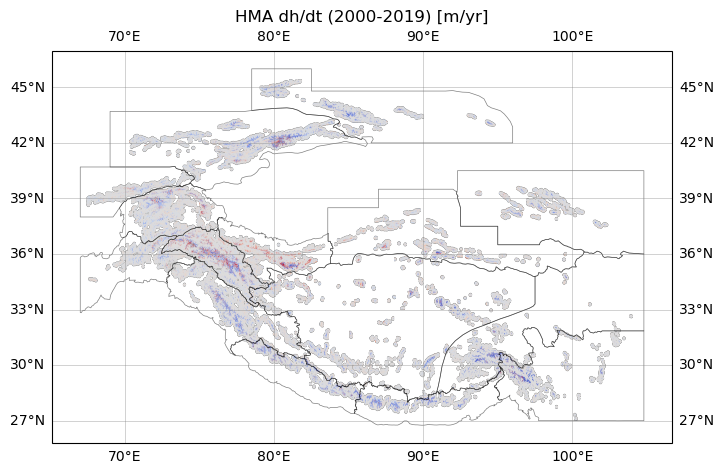

In [5]:
## Plotting the downsampled HMA dhdt data
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.imshow(arr_down, cmap='coolwarm', vmin=-0.5, vmax=0.5, extent=hma_dhdt_extent)
hma_gtng_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5, alpha=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
ax.set_title('HMA dh/dt (2000-2019) [m/yr]')
fig.savefig('figures/glacier-height/hma_dhdt_2000_2019.png', dpi=300, bbox_inches='tight')



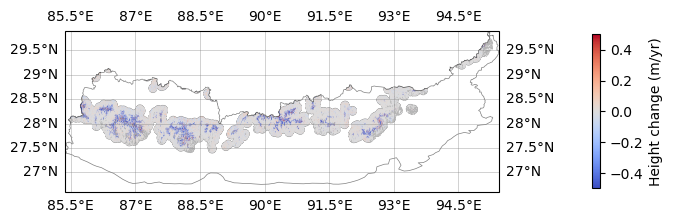

In [ ]:
## Plotting the HMA subregion dhdt data
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
im_show = ax.imshow(arr_subreg, cmap='coolwarm', vmin=-0.5, vmax=0.5, extent=hma_subreg_dhdt_extent)
hma_subreg_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5, alpha=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
plt.colorbar(im_show, ax=ax, pad=0.15, shrink=0.5, orientation='vertical', label='Height change (m/yr)')


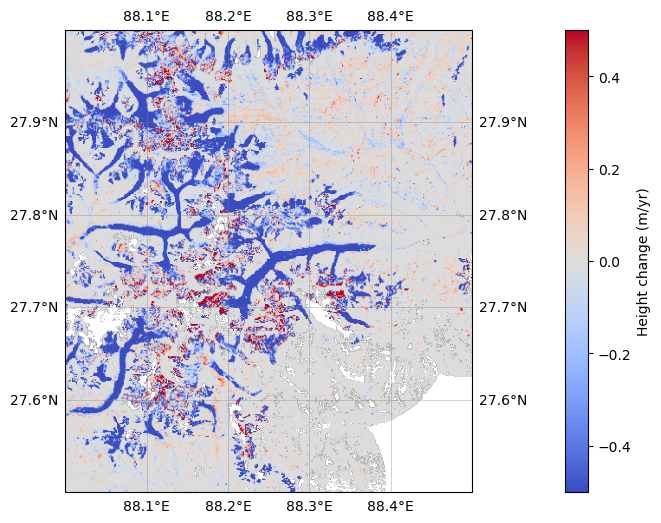

In [7]:
## Plotting the local region of HMA
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([88, 88.5, 27.5, 28], crs=ccrs.PlateCarree())
im_show = ax.imshow(arr_subreg, cmap='coolwarm', vmin=-0.5, vmax=0.5, extent=hma_subreg_dhdt_extent)
hma_subreg_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5, alpha=0.5)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
plt.colorbar(im_show, ax=ax, pad=0.15, orientation='vertical', label='Height change (m/yr)')

